In [1]:
import pandas as pd
import sklearn 
from sklearn import cluster
import matplotlib
import geopandas as gpd
from sklearn.linear_model import LinearRegression
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
# dropout location clustering
'''
data_directory = 'q113_pickup_sample_ct.csv'
data = pd.read_csv(data_directory)
gp_data = data.groupby('dropoff').count()

gp_data = gp_data.reset_index(drop = False).iloc[:,:2]
gp_data.columns = ['ct', 'count']

gp_data.head()
'''

In [60]:
# cluster model
'''
kmeans = cluster.KMeans(n_clusters= 4)
label = kmeans.fit_predict(gp_data)
'''

In [207]:
# loading taxi & bus data
taxi_ts = 'timeseries/taxi_timeseries.csv'
bus_ts = 'timeseries/bus_timeseries.csv'

taxi_ts = pd.read_csv(taxi_ts)
bus_ts = pd.read_csv(bus_ts)

taxi_ts['monthyear'] = taxi_ts.month.apply(str ) + taxi_ts.year.apply(str)

In [209]:
# linear regression
x = range(len(taxi_ts))

intercept = []
slope = []
for bus in taxi_ts.columns[2:6]:
    lr = LinearRegression(fit_intercept=True)
    lr.fit(pd.DataFrame(x), pd.DataFrame(taxi_ts.loc[:,bus]))
    slope.append(lr.coef_[0][0])
    intercept.append(lr.intercept_[0])

In [210]:
# linear regression result
regression_res = pd.DataFrame([taxi_ts.columns[2:6], slope, intercept]).T

regression_res.columns = ['bus', 'slope', 'intercept']
regression_res

,bus,slope,intercept
0,q65,2981.72,38513.6
1,bx15,8622.03,140334
2,b41,8977.6,20974.9
3,q113,418.922,2143.74


In [211]:
# bus data
bus_ts = bus_ts.T
bus_ts.columns = bus_ts.iloc[0,:]
bus_ts = bus_ts.iloc[1:,:]

bus_ts.iloc[:,0] = bus_ts.iloc[:,0].apply(lambda x: int(x.split(',')[0] + x.split(',')[1]))
bus_ts.iloc[:,1] = bus_ts.iloc[:,1].apply(lambda x: int(x.split(',')[0] + x.split(',')[1]))
bus_ts.iloc[:,2] = bus_ts.iloc[:,2].apply(lambda x: int(x.split(',')[0] + x.split(',')[1]))
bus_ts.iloc[:,3] = bus_ts.iloc[:,3].apply(lambda x: int(x.split(',')[0] + x.split(',')[1]))

bus_ts

bus,q113,b41,q65,bx15
2013,11745,32431,20227,26235
2014,9019,30701,20685,32328
2015,4537,28690,21080,30687


In [212]:
# months number in each year 
yr_13 = len(taxi_ts[taxi_ts.year == 2013])
yr_14 = len(taxi_ts[taxi_ts.year == 2014])
yr_15 = len(taxi_ts[taxi_ts.year == 2015])

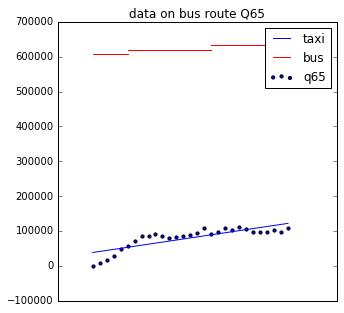

In [256]:
plt.figure(figsize = [5,5])
x_plot = np.linspace(0, 28, 1000)
y_plot = regression_res.slope[0] * x_plot + regression_res.intercept[0]
plt.plot(x_plot, y_plot, label = 'taxi')
plt.scatter(x, taxi_ts.q65, s = 10)
plt.plot(np.linspace(0, yr_13, 200), [bus_ts.loc['2013', 'q65'] * 30] * 200, color = 'r', label = 'bus')
plt.plot(np.linspace(yr_13, yr_13 + yr_14, 200), [bus_ts.loc['2014', 'q65'] * 30] * 200, color = 'r')
plt.plot(np.linspace(yr_13 + yr_14, yr_13 + yr_14 + yr_15, 200), [bus_ts.loc['2015', 'q65'] * 30] * 200, color = 'r')

#plt.xlim(0,30)
plt.xticks([])
plt.legend()
plt.title('data on bus route Q65')
plt.savefig('q65')

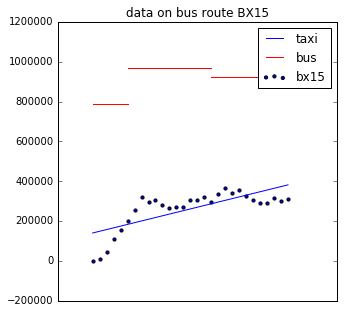

In [255]:
plt.figure(figsize = [5,5])
x_plot = np.linspace(0, 28, 1000)
y_plot = regression_res.slope[1] * x_plot + regression_res.intercept[1]
plt.plot(x_plot, y_plot, label = 'taxi')
plt.scatter(x, taxi_ts.bx15, s = 10)
plt.plot(np.linspace(0, yr_13, 200), [bus_ts.loc['2013', 'bx15'] * 30] * 200, color = 'r', label = 'bus')
plt.plot(np.linspace(yr_13, yr_13 + yr_14, 200), [bus_ts.loc['2014', 'bx15'] * 30] * 200, color = 'r')
plt.plot(np.linspace(yr_13 + yr_14, yr_13 + yr_14 + yr_15, 200), [bus_ts.loc['2015', 'bx15'] * 30] * 200, color = 'r')

#plt.xlim(0,30)
plt.xticks([])
plt.legend()
plt.title('data on bus route BX15')
plt.savefig('bx15')

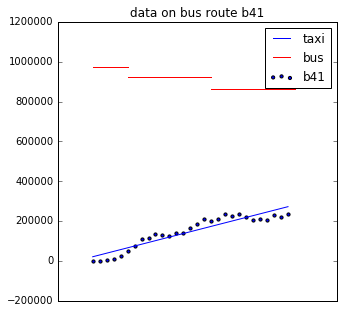

In [257]:
plt.figure(figsize = [5,5])
x_plot = np.linspace(0, 28, 1000)
y_plot = regression_res.slope[2] * x_plot + regression_res.intercept[2]
plt.plot(x_plot, y_plot, label = 'taxi')
plt.scatter(x, taxi_ts.b41, s = 10)
plt.plot(np.linspace(0, yr_13, 200), [bus_ts.loc['2013', 'b41'] * 30] * 200, color = 'r', label = 'bus')
plt.plot(np.linspace(yr_13, yr_13 + yr_14, 200), [bus_ts.loc['2014', 'b41'] * 30] * 200, color = 'r')
plt.plot(np.linspace(yr_13 + yr_14, yr_13 + yr_14 + yr_15, 200), [bus_ts.loc['2015', 'b41'] * 30] * 200, color = 'r')

#plt.xlim(0,30)
plt.xticks([])
plt.legend()
plt.title('data on bus route b41')
plt.savefig('B41')

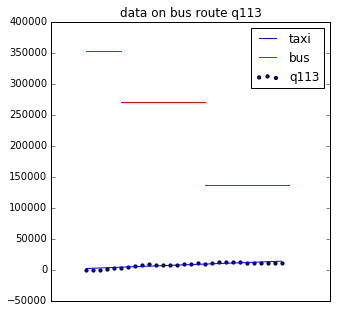

In [258]:
plt.figure(figsize = [5,5])
x_plot = np.linspace(0, 28, 1000)
y_plot = regression_res.slope[3] * x_plot + regression_res.intercept[3]
plt.plot(x_plot, y_plot, label = 'taxi')
plt.scatter(x, taxi_ts.q113, s = 10)
plt.plot(np.linspace(0, yr_13, 200), [bus_ts.loc['2013', 'q113'] * 30] * 200, color = 'r', label = 'bus')
plt.plot(np.linspace(yr_13, yr_13 + yr_14, 200), [bus_ts.loc['2014', 'q113'] * 30] * 200, color = 'r')
plt.plot(np.linspace(yr_13 + yr_14, yr_13 + yr_14 + yr_15, 200), [bus_ts.loc['2015', 'q113'] * 30] * 200, color = 'r')

#plt.xlim(0,30)
plt.xticks([])
plt.legend()
plt.title('data on bus route q113')
plt.savefig('q113')